### Tutorial 07: Extracting Features from Images

In this tutorial, we will explore step-by-step methods for extracting features from images. Feature extraction involves identifying key points, edges, or patterns in an image to enable analysis and recognition tasks. Using Python and libraries like OpenCV and scikit-image, we will cover the following methods:

- Color-Based Feature Extraction
- Edge Detection
- SIFT (Scale-Invariant Feature Transform)
- Circle Detection

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def extract_contour_no(gray_img):
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_img)

    # Optionally, apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced_img, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours from the edges
    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

In [10]:
import cv2
import numpy as np

def extract_contour(gray_img):
    # Apply CLAHE to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_img)

    # Optionally, apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced_img, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 50, 250)

    # Perform Morphological Operations
    kernel = np.ones((2, 2), np.uint8)

    # Apply Opening (erosion followed by dilation)
    opened = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)

    # Apply Closing (dilation followed by erosion)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

    # Find contours from the processed image
    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours


Number of keypoints detected by SIFT: 246
Number of keypoints detected by ORB: 1141


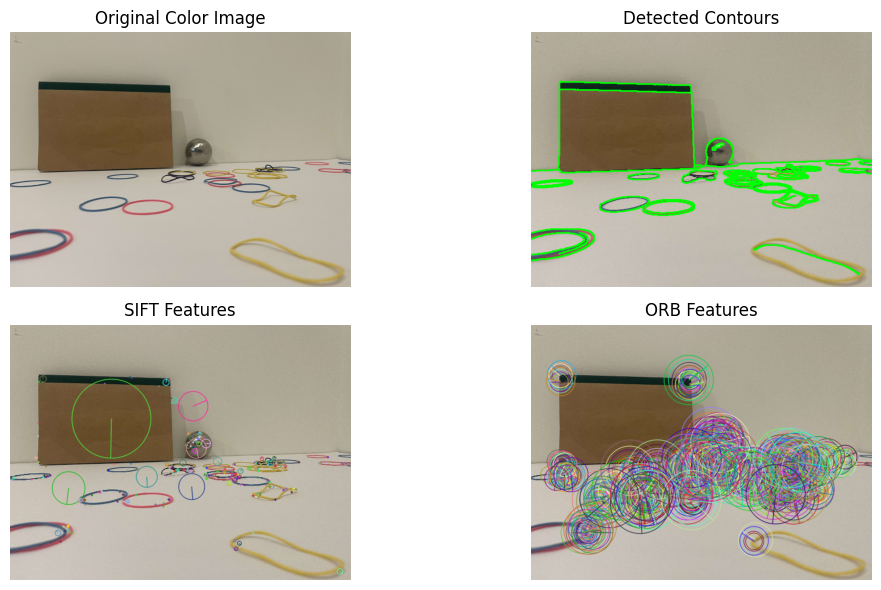

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image as a color image
img_path = './data/sphere/7.jpg'
#img_path = './data/pet_images/Golden_retriever_05182.jpg'
color_image = cv2.imread(img_path, cv2.IMREAD_COLOR)

if color_image is None:
    raise Exception("Image not found")

resized_image = cv2.resize(color_image, (640, 480)) 
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Extract contours
contours = extract_contour(gray_image)
contour_image = cv2.drawContours(resized_image.copy(), contours, -1, (0, 255, 0), 2)


# Extract SIFT features
sift = cv2.SIFT_create(contrastThreshold=0.04, nOctaveLayers=3)
keypoints_sift, descriptors = sift.detectAndCompute(gray_image, None)
print(f'Number of keypoints detected by SIFT: {len(keypoints_sift)}')


# Extract ORB features
orb = cv2.ORB_create()
orb = cv2.ORB_create(nfeatures=5000)  # Set to detect more keypoints
keypoints_orb, descriptors = orb.detectAndCompute(gray_image, None)
print(f'Number of keypoints detected by ORB: {len(keypoints_orb)}')

img_orb = cv2.drawKeypoints(resized_image.copy(), keypoints_orb, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img_keypoints = cv2.drawKeypoints(resized_image.copy(), keypoints_sift, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# Display the original color image 
ax[0, 0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
ax[0, 0].axis('off')
ax[0, 0].set_title('Original Color Image')

# Display the contour-detected image 
ax[0, 1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax[0, 1].axis('off')
ax[0, 1].set_title('Detected Contours')

# Display the SIFT features image 
ax[1, 0].imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
ax[1, 0].axis('off')
ax[1, 0].set_title('SIFT Features')

# Display the ORB features image 
ax[1, 1].imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
ax[1, 1].axis('off')
ax[1, 1].set_title('ORB Features')

# Display the images
plt.tight_layout()
plt.show()




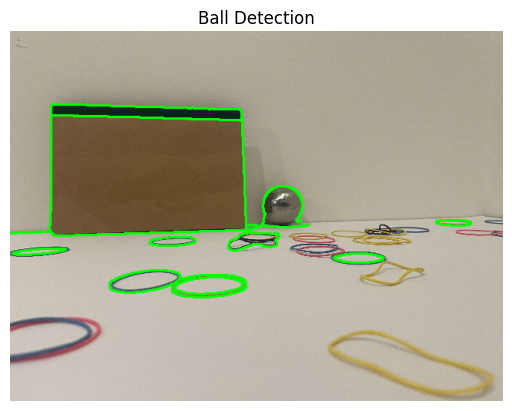

In [12]:
def check_sphere_ball(contours,image):  
    
    min_area = 100  # Minimum area threshold
    max_area = 5000  # Maximum area threshold

    # Filter contours based on area
    filtered_contours = [contour for contour in contours if min_area < cv2.contourArea(contour) < max_area]
        
    valid_contours = []
    for contour in filtered_contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        if perimeter == 0:  # Avoid division by zero
            continue

        circularity = 4 * np.pi * area / (perimeter ** 2)
        
        # Check if the contour is roughly circular--> 0.01 < circularity < 2 and 
        if area > min_area and circularity>0:
            valid_contours.append(contour)
    

    for contour in valid_contours:
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Ball Detection')
    plt.show()


# Load the image as a color image
img_path = './data/sphere/7.jpg'
#img_path = './data/pet_images/Golden_retriever_05182.jpg'
color_image = cv2.imread(img_path, cv2.IMREAD_COLOR)

if color_image is None:
    raise Exception("Image not found")

resized_image = cv2.resize(color_image, (640, 480)) 
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Extract contours
contours = extract_contour(gray_image)
contour_image = cv2.drawContours(resized_image.copy(), contours, -1, (0, 255, 0), 2)
check_sphere_ball(contours,resized_image.copy())

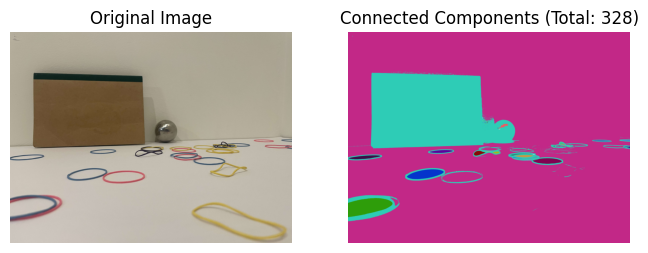

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def connected_components(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    
    num_labels, labels = cv2.connectedComponents(binary_image)
    output_image = cv2.convertScaleAbs(labels)  
   
    color_map = np.random.randint(0, 255, (num_labels, 3), dtype=np.uint8)
    color_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)

    
    for i in range(num_labels):
        color_image[labels == i] = color_map[i]

    return num_labels, labels, color_image


img_path = './data/sphere/7.jpg'
image = cv2.imread(img_path)

if image is None:
    raise Exception("Image not found")

num_labels, labels, result_image = connected_components(image)

# Show the results
plt.figure(figsize=(8, 8))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title(f"Connected Components (Total: {num_labels - 1})")
plt.axis('off')

plt.show()




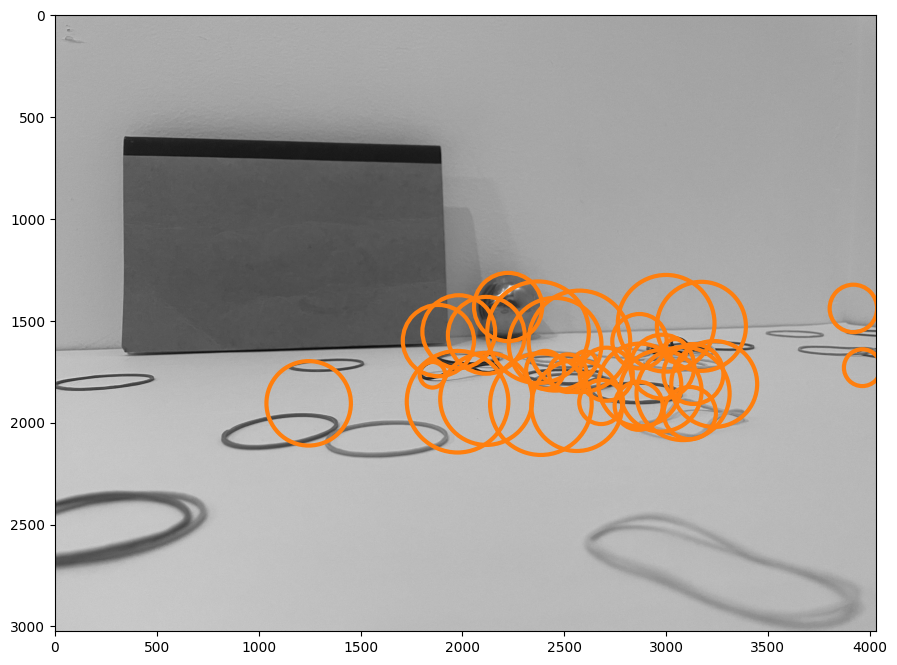

In [7]:
## Detecting the circle 

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 100, param1=130, param2=30, minRadius=50, maxRadius=250)
if circles is not None:
    for x, y, r in circles[0]:
        c = plt.Circle((x, y), r, fill=False, lw=3, ec='C1')
        plt.gca().add_patch(c)
plt.gcf().set_size_inches((12, 8))
plt.show()